In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**Uploading the dataset to python**

In [ ]:
#Uploading the dataset to python
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
df_ = pd.read_excel('CovidData.xlsx') #/content/drive/My Drive/Math Project/

# **DATA PREPROCESSING**

**I. Selecting our subject: (Confirmed new cases)  The variables are:** (see link: https://github.com/owid/covid-19-data/tree/master/public/data) \\
**II. Selecting out countries: Dominican Republic, India, World**

In [64]:
variables = ['iso_code','location','date','new_cases_smoothed_per_million','gdp_per_capita']
#'new_deaths_smoothed_per_million','new_tests_smoothed_per_thousand','gdp_per_capita'
country = ['Dominican Republic','India','World']
df = df_[variables]
df = df.loc[df['location'].isin(country)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 57431 to 230870
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        3022 non-null   object 
 1   location                        3022 non-null   object 
 2   date                            3022 non-null   object 
 3   new_cases_smoothed_per_million  3002 non-null   float64
 4   gdp_per_capita                  3022 non-null   float64
dtypes: float64(2), object(3)
memory usage: 141.7+ KB


**III a.check for null values on our variables**

In [65]:
for i in variables:
  print(i ,'---', df[i].isnull().values.any())

iso_code --- False
location --- False
date --- False
new_cases_smoothed_per_million --- True
gdp_per_capita --- False


**III b. Clean the rows that have null variables**

In [66]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 57436 to 230870
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        3002 non-null   object 
 1   location                        3002 non-null   object 
 2   date                            3002 non-null   object 
 3   new_cases_smoothed_per_million  3002 non-null   float64
 4   gdp_per_capita                  3002 non-null   float64
dtypes: float64(2), object(3)
memory usage: 140.7+ KB


**III c Filter the data by the date**

In [67]:
print(min(df[df['location'] == 'India']['date']))
print(min(df[df['location'] == 'Dominican Republic']['date']))
print(min(df[df['location'] == 'World']['date']))
print('000')
print(max(df[df['location'] == 'India']['date']))
print(max(df[df['location'] == 'Dominican Republic']['date']))
print(max(df[df['location'] == 'World']['date']))

2020-02-04
2020-03-06
2020-01-27
000
2022-11-06
2022-11-08
2022-11-09


In [68]:
df = df[df['date'] >= '2020-03-06']
df = df[df['date'] <= '2022-11-06']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 57436 to 230867
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        2927 non-null   object 
 1   location                        2927 non-null   object 
 2   date                            2927 non-null   object 
 3   new_cases_smoothed_per_million  2927 non-null   float64
 4   gdp_per_capita                  2927 non-null   float64
dtypes: float64(2), object(3)
memory usage: 137.2+ KB


In [69]:
df[df['location'] == 'Dominican Republic'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 57436 to 58411
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        976 non-null    object 
 1   location                        976 non-null    object 
 2   date                            976 non-null    object 
 3   new_cases_smoothed_per_million  976 non-null    float64
 4   gdp_per_capita                  976 non-null    float64
dtypes: float64(2), object(3)
memory usage: 45.8+ KB


In [70]:
df[df['location'] == 'World'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 229892 to 230867
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        976 non-null    object 
 1   location                        976 non-null    object 
 2   date                            976 non-null    object 
 3   new_cases_smoothed_per_million  976 non-null    float64
 4   gdp_per_capita                  976 non-null    float64
dtypes: float64(2), object(3)
memory usage: 45.8+ KB


**IV. Describe our DF. Check our info for uncomputable data or error data.**

In [71]:
df.describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,2927.000000,2927.000000
mean,57.447745,12167.541345
std,70.511202,4073.484714
min,0.000000,6426.674000
25%,12.881500,6426.674000
50%,39.824000,14600.861000
75%,73.431500,15469.207000
max,568.003000,15469.207000


*Since we have "world" on our contries, we need to analyze each countrie as this own*

In [72]:
df[df['location'] == 'Dominican Republic'].describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,976.000000,9.760000e+02
mean,59.073182,1.460086e+04
std,74.177910,2.984672e-10
min,0.000000,1.460086e+04
25%,23.333000,1.460086e+04
50%,41.526000,1.460086e+04
75%,74.674000,1.460086e+04
max,568.003000,1.460086e+04


In [73]:
df[df['location'] == 'India'].describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,975.000000,9.750000e+02
mean,32.318668,6.426674e+03
std,52.869678,5.823753e-11
min,0.003000,6.426674e+03
25%,4.691000,6.426674e+03
50%,12.714000,6.426674e+03
75%,32.309000,6.426674e+03
max,276.065000,6.426674e+03


*Our data seems correct, we don't have infinite values and negatives. In our knowledge of our countries this numbers makes sense.*

In [74]:
df[df['location'] == 'World'].describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,976.000000,9.760000e+02
mean,80.925639,1.546921e+04
std,73.756340,2.784481e-10
min,0.319000,1.546921e+04
25%,45.799250,1.546921e+04
50%,65.415000,1.546921e+04
75%,82.683000,1.546921e+04
max,430.845000,1.546921e+04


**IV b.We would double check if we have Infinite Values**

In [90]:
variables2 = ['new_cases_smoothed_per_million']

for i in variables2:
  print(i ,'---', np.isinf(df[i]).values.sum())

new_cases_smoothed_per_million --- 0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 57436 to 230867
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        2927 non-null   object 
 1   location                        2927 non-null   object 
 2   date                            2927 non-null   object 
 3   new_cases_smoothed_per_million  2927 non-null   float64
 4   gdp_per_capita                  2927 non-null   float64
dtypes: float64(2), object(3)
memory usage: 137.2+ KB


# **GRAPHS**

**HISTOGRAMS OF THE NUMERICAL COLUMNS**

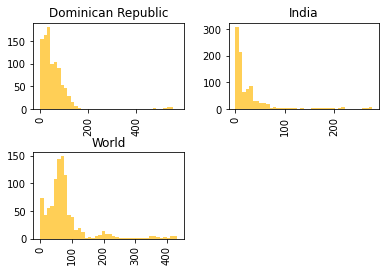

In [92]:
#df.hist(column='new_cases_smoothed_per_million', by='location')
df.hist(column='new_cases_smoothed_per_million',by='location',
        grid=False,
        legend=False,
        bins=40,
        color='#FFCF56');
#figsize

In [93]:
variables2 = ['total_cases','new_cases','new_cases_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million']

In [94]:
variables3 = ['new_cases_smoothed','new_cases_smoothed_per_million']

***1. Time Series Plots of Y for X***

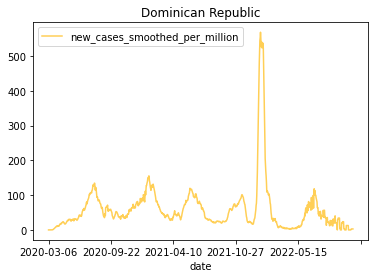

In [95]:
df[df['location'] == 'Dominican Republic'].plot.line(x = 'date', y= 'new_cases_smoothed_per_million',color='#FFCF56',title ='Dominican Republic')
plt.ticklabel_format(style='plain', axis='y')

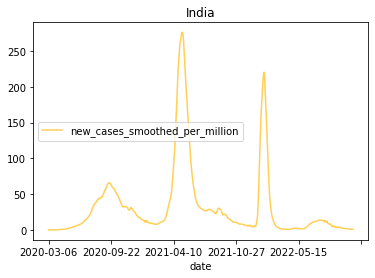

In [96]:
df[df['location'] == 'India'].plot.line(x = 'date', y= 'new_cases_smoothed_per_million',color='#FFCF56',title ='India')
plt.ticklabel_format(style='plain', axis='y')

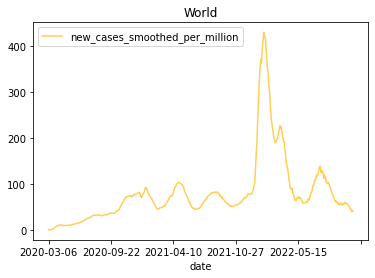

In [97]:

df[df['location'] == 'World'].plot.line(x = 'date', y= 'new_cases_smoothed_per_million',color='#FFCF56',title ='World')
plt.ticklabel_format(style='plain', axis='y')

***2. Cumulative plots of Y for X***

In [98]:
import plotly.express as px
fig = px.ecdf(df[df['location'] == 'Dominican Republic'], y="new_cases_smoothed_per_million", x = 'date',title='Dominican Republic')
fig.show()

In [99]:
import plotly.express as px
fig = px.ecdf(df[df['location'] == 'India'], y="new_cases_smoothed_per_million", x = 'date',title='India')
fig.show()

In [100]:
import plotly.express as px
fig = px.ecdf(df[df['location'] == 'World'], y="new_cases_smoothed_per_million", x = 'date',title='World')
fig.show()

***3. The Rate of Change of Y for X***

In [101]:
#Rate of change by month

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 57436 to 230867
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso_code                        2927 non-null   object 
 1   location                        2927 non-null   object 
 2   date                            2927 non-null   object 
 3   new_cases_smoothed_per_million  2927 non-null   float64
 4   gdp_per_capita                  2927 non-null   float64
dtypes: float64(2), object(3)
memory usage: 137.2+ KB


In [103]:
# create a new data frame with monthly data
df2 = df
df2['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df2.head()

,iso_code,location,date,new_cases_smoothed_per_million,gdp_per_capita,month_year
57436,DOM,Dominican Republic,2020-03-06,0.025,14600.861,2020-03
57437,DOM,Dominican Republic,2020-03-07,0.025,14600.861,2020-03
57438,DOM,Dominican Republic,2020-03-08,0.051,14600.861,2020-03
57439,DOM,Dominican Republic,2020-03-09,0.051,14600.861,2020-03
57440,DOM,Dominican Republic,2020-03-10,0.051,14600.861,2020-03


In [104]:
df2_DR =  df2[df2['location'] == 'Dominican Republic']
df2_DR =  df2_DR.groupby(['month_year']).mean()
df2_DR.head()

,new_cases_smoothed_per_million,gdp_per_capita
month_year,,
2020-03,2.468154,14600.861
2020-04,16.578900,14600.861
2020-05,28.198065,14600.861
2020-06,42.857433,14600.861
2020-07,99.515161,14600.861


In [105]:
df2_India = df2[df2['location'] == 'India']
df2_India =  df2_India.groupby(['month_year']).mean()
df2_India.head()

,new_cases_smoothed_per_million,gdp_per_capita
month_year,,
2020-03,0.026577,6426.674
2020-04,0.673633,6426.674
2020-05,3.114258,6426.674
2020-06,8.524033,6426.674
2020-07,22.904419,6426.674


In [106]:
df2_World = df2[df2['location'] == 'World']
df2_World = df2_World.groupby(['month_year']).mean()
df2_World.head()

,new_cases_smoothed_per_million,gdp_per_capita
month_year,,
2020-03,2.777154,15469.207
2020-04,10.093133,15469.207
2020-05,11.289194,15469.207
2020-06,17.326700,15469.207
2020-07,27.609000,15469.207


<AxesSubplot:title={'center':'Dominican Republic'}, xlabel='month_year'>

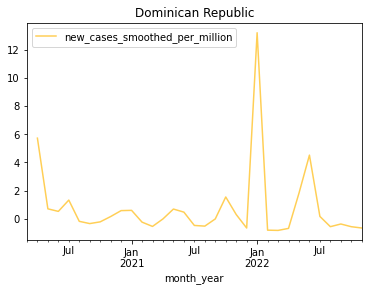

In [107]:
df2_DR.pct_change().plot(y = 'new_cases_smoothed_per_million',title = 'Dominican Republic',color='#FFCF56')

<AxesSubplot:title={'center':'India'}, xlabel='month_year'>

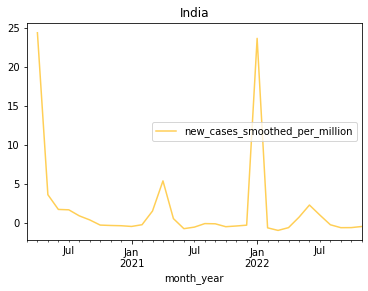

In [108]:
df2_India.pct_change().plot(y = 'new_cases_smoothed_per_million', title = 'India',color='#FFCF56')

<AxesSubplot:title={'center':'World'}, xlabel='month_year'>

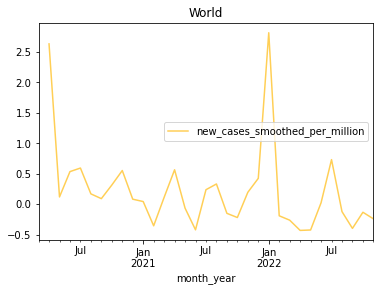

In [109]:
df2_World.pct_change().plot(y = 'new_cases_smoothed_per_million',color='#FFCF56',title='World')

In [36]:
#we can add info about the test and positive to compare if the number of cases is increased because more people were taking test.

**Scatter Plot of GDP(X) vs Y for Past Years/Months**

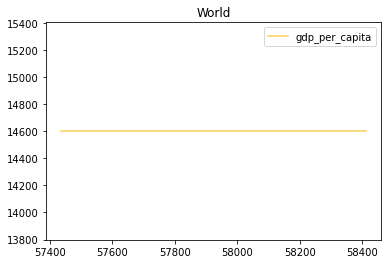

In [110]:
df[df['location'] == 'Dominican Republic'].plot.line( y= 'gdp_per_capita',color='#FFCF56',title ='World')
plt.ticklabel_format(style='plain', axis='y')

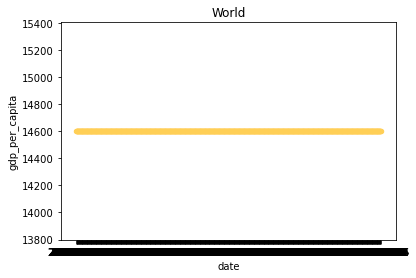

In [111]:
df[df['location'] == 'Dominican Republic'].plot.scatter(x='date', y= 'gdp_per_capita',color='#FFCF56',title ='World')
plt.ticklabel_format(style='plain', axis='y')

<AxesSubplot:xlabel='month_year'>

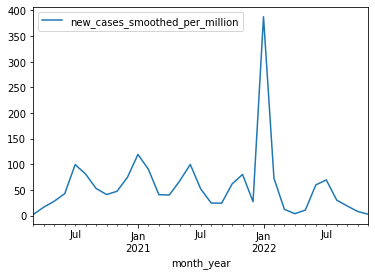

In [112]:
df2_DR.plot(y= 'new_cases_smoothed_per_million')

<AxesSubplot:xlabel='month_year'>

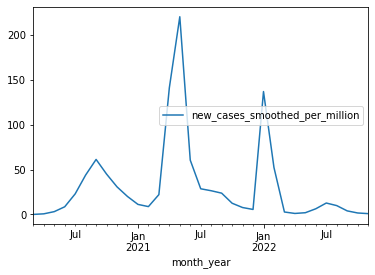

In [113]:
df2_India.plot(y= 'new_cases_smoothed_per_million')

**Barchart comparing Dominican Republic, India and the World for averages of new cases per million**

In [114]:
df3 =  df2.groupby(['location']).mean()
df3.head()

,new_cases_smoothed_per_million,gdp_per_capita
location,,
Dominican Republic,59.073182,14600.861
India,32.318668,6426.674
World,80.925639,15469.207


<AxesSubplot:xlabel='location'>

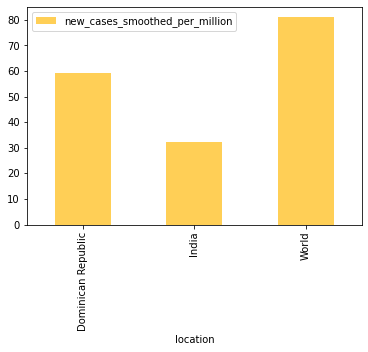

In [115]:
df3.plot(y='new_cases_smoothed_per_million',kind='bar', color = '#FFCF56')

In [116]:
df2_DR.pct_change().describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,32.000000,3.200000e+01
mean,0.766561,-3.469447e-18
std,2.680169,1.962616e-17
min,-0.830161,-1.110223e-16
25%,-0.530890,0.000000e+00
50%,-0.014838,0.000000e+00
75%,0.616834,0.000000e+00
max,13.198937,0.000000e+00


In [117]:
df2_India.pct_change().describe()

,new_cases_smoothed_per_million,gdp_per_capita
count,32.000000,32.0
mean,1.865128,0.0
std,5.963937,0.0
min,-0.948117,0.0
25%,-0.453483,0.0
50%,-0.222746,0.0
75%,1.141980,0.0
max,24.346551,0.0


**Heatmap of Correlations for Y with other Attributes**

In [127]:
variables = ['iso_code','location','date','new_cases_smoothed','new_deaths_smoothed','new_vaccinations_smoothed','new_tests_smoothed']
#'new_deaths_smoothed_per_million','new_tests_smoothed_per_thousand','gdp_per_capita','new_tests_smoothed'
country = ['Dominican Republic','India','World']
data = df_[variables]
data = data.loc[data['location'].isin(country)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 57431 to 230870
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso_code                   3022 non-null   object 
 1   location                   3022 non-null   object 
 2   date                       3022 non-null   object 
 3   new_cases_smoothed         3002 non-null   float64
 4   new_deaths_smoothed        2948 non-null   float64
 5   new_vaccinations_smoothed  1996 non-null   float64
 6   new_tests_smoothed         1641 non-null   float64
dtypes: float64(4), object(3)
memory usage: 188.9+ KB


In [129]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 57783 to 96118
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso_code                   1010 non-null   object 
 1   location                   1010 non-null   object 
 2   date                       1010 non-null   object 
 3   new_cases_smoothed         1010 non-null   float64
 4   new_deaths_smoothed        1010 non-null   float64
 5   new_vaccinations_smoothed  1010 non-null   float64
 6   new_tests_smoothed         1010 non-null   float64
dtypes: float64(4), object(3)
memory usage: 63.1+ KB


In [130]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

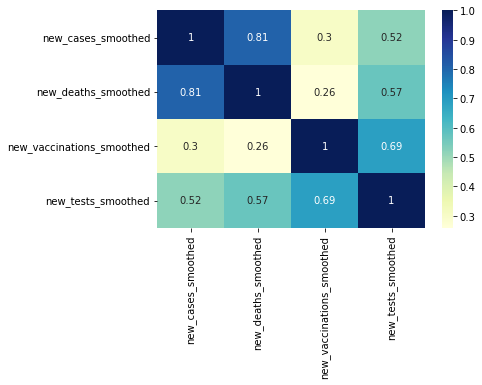

In [131]:
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

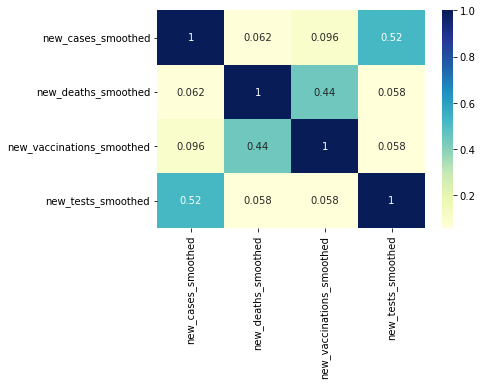

In [132]:
# plotting correlation heatmap
dataplot = sb.heatmap(data[data['location'] =='Dominican Republic'].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

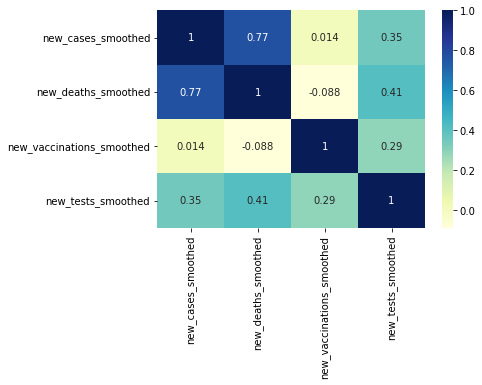

In [133]:
# plotting correlation heatmap
dataplot = sb.heatmap(data[data['location'] =='India'].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [135]:
data[data['location'] =='World']

,iso_code,location,date,new_cases_smoothed,new_deaths_smoothed,new_vaccinations_smoothed,new_tests_smoothed


In [137]:
# plotting correlation heatmap
#dataplot = sb.heatmap(data[data['location'] =='World'].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
#mp.show()

**Scatter Plots of HDI of All Countries**

In [138]:
variables = ['continent','date','new_cases_smoothed_per_million','human_development_index']
#'new_deaths_smoothed_per_million','new_tests_smoothed_per_thousand','gdp_per_capita','new_tests_smoothed'
#country = ['Dominican Republic','India','World']
data = df_[variables]
#data = data.loc[data['location'].isin(country)]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233747 entries, 0 to 233746
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   continent                       220554 non-null  object 
 1   date                            233747 non-null  object 
 2   new_cases_smoothed_per_million  218145 non-null  float64
 3   human_development_index         183833 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.1+ MB


In [139]:
data = data[data['date']=='2022-11-06']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 986 to 233743
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       218 non-null    object 
 1   date                            231 non-null    object 
 2   new_cases_smoothed_per_million  218 non-null    float64
 3   human_development_index         189 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.0+ KB


In [140]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 986 to 233743
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       176 non-null    object 
 1   date                            176 non-null    object 
 2   new_cases_smoothed_per_million  176 non-null    float64
 3   human_development_index         176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.9+ KB


In [145]:
data.head(3)

,continent,date,new_cases_smoothed_per_million,human_development_index
986,Asia,2022-11-06,2.483,0.511
2976,Europe,2022-11-06,4.473,0.795
3965,Africa,2022-11-06,0.118,0.748


<AxesSubplot:xlabel='human_development_index', ylabel='new_cases_smoothed_per_million'>

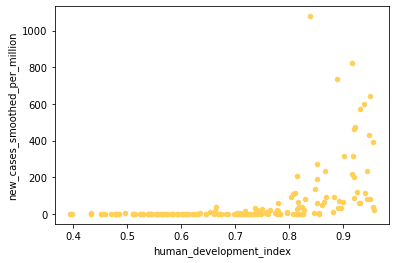

In [146]:
data.plot(x ='human_development_index' ,y='new_cases_smoothed_per_million',kind='scatter',color = '#FFCF56')

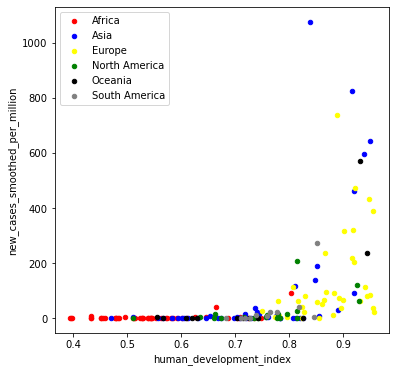

In [147]:
fig, ax = plt.subplots(figsize=(6, 6))

grouped = data.groupby('continent')
colors = {'Europe':'yellow', 'Asia':'blue', 'Oceania':'black','Africa':'red','North America':'green','South America':'gray'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='human_development_index', y='new_cases_smoothed_per_million', label=key, color=colors[key])
plt.show()

In [148]:
variables = ['location','new_cases_smoothed_per_million','human_development_index']
#'new_deaths_smoothed_per_million','new_tests_smoothed_per_thousand','gdp_per_capita','new_tests_smoothed'
country = ['Dominican Republic','India']
data = df_[variables]
data = data.loc[data['location'].isin(country)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 57431 to 96259
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        1999 non-null   object 
 1   new_cases_smoothed_per_million  1984 non-null   float64
 2   human_development_index         1999 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.5+ KB


In [149]:
data =  data.groupby(['location']).mean()
data.head()

,new_cases_smoothed_per_million,human_development_index
location,,
Dominican Republic,58.957335,0.756
India,31.322770,0.645


<AxesSubplot:xlabel='human_development_index'>

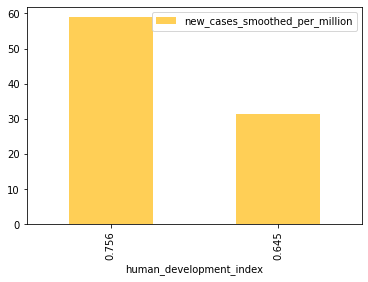

In [150]:
data.plot(kind='bar',x = 'human_development_index', color ='#FFCF56' )